# Week 05: Pre-Class Assignment: <br> Statistics and outliers

### <p style="text-align: right;"> &#9989; Kyle Taft


![xkcd](https://imgs.xkcd.com/comics/health_stats_2x.png)
___

### Goals for this week's pre-class assignment

In this Pre-Class Assignment you are going to use some statistics measures in the context of machine learning. The main learning goals are:

* learn some useful methods in Python,
* practice making nice plots,
* become more familiar with multivariate gaussians,
* practice some statistics,

If you are not yet a Python expert, you might look these up to help you this week:
* `np.atleast_2d`
* `np.ravel`
* `np.meshgrid`
* `np.concatenate`
* `sns.pairplot`
* `np.stack`

Total number of points: **55 points**

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-Class Assignments" submission folder on D2L.  Submission instructions can be found at the end of the notebook.

In [1]:
# Import the needed libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal

import matplotlib.ticker as mticker


import pandas as pd
import seaborn as sns

## Part 1: Violin and Box Plots Using Seaborn (20 points)

When you start a machine learning project from scratch, but you have a data set in mind, the next step is _Exploratory Data Analysis_ ([EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)). Most of EDA is looking for statistical trends in your data, and that is just what `seaborn` is designed to help you do! 

The `seaborn` library offers capability for visualizing data sets and performing simple statistics on them. Making such visualizations can be very useful for exploring data sets that are simple, where "simple" means low-enough dimensionality that 2D projections on your screen are meaningful. (Or, you can perform PCA first on a higher dimensional dataset before attempting the visualization.) As with some of the other libraries, `seaborn` has some simple datasets built in: we'll grab the very common iris dataset. In this problem you are going to explore one of `seaborn`'s capabilities. 

In [2]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
species = iris.target_names

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data, columns=feature_names)
df['species'] = [species[i] for i in target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Let's explore the `pairplot`, which reveals correlations in the data.

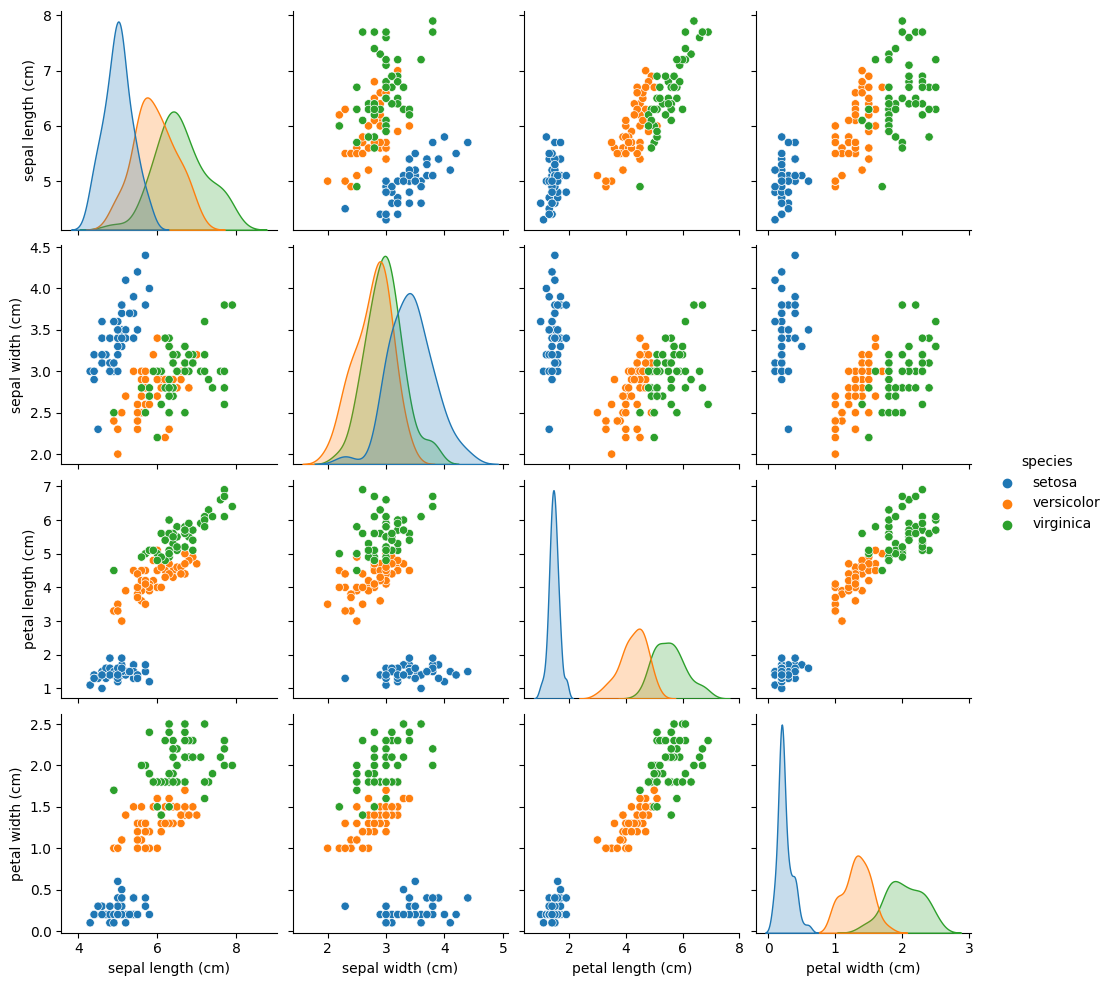

In [3]:
sns.pairplot(df, hue="species") 

&#9989; **Task 1.1: (8 points)** Here, you will explore an alternate tool that gives similar information. Using the internet, look up what [violin plots](https://en.wikipedia.org/wiki/Violin_plot) and [box plots](https://en.wikipedia.org/wiki/Box_plot) are, and describe *in detail* what they show:

There are a lot of options when making box plots. In your answer consider some of these options - the Seaborn [page on boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) has a lot of examples. 

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. The classic box plot show the median, the interquartile range, and the outliers of a data set. These are used to show the skewness and the spread of the data. You can read the skewness by seeing whether the median is closer to the lower or upper quartile. The box itself shows the spread of 75% of the data while the whiskers show 1.5 the IQR. The outliers are shown as dots outside of the whiskers. Some options that Seaborn allows to differ from the classic box plot are the ability to color them dependent on a variable, the ability expand the whiskers to the full range, and the ability change the quartile range you are looking over.
   
2. A violin plot is the combination of a box plot and a kernel density plot. The box plot shows is the same as above while the kernel density plot shows the distribution of the data. For example, if the data is bimodal, the violin plot will show two peaks in the kernel density plot while the box plot show the skewness and spread of the data.


As you can see, making violin and box plots would be very time consuming with matplotlib, but very desirable for pre-ML EDA.  This is exactly the niche that Seaborn fills. Seaborn has a nice [gallery](https://seaborn.pydata.org/examples/index.html) of ideas to choose from as well as [good documentation](https://seaborn.pydata.org/tutorial.html) to get you exactly what you need. 

&#9989; **Task 1.2: (2 points)**  Next, make four violin plots, one for each feature of the dataset. There is a bit of code to guide you.

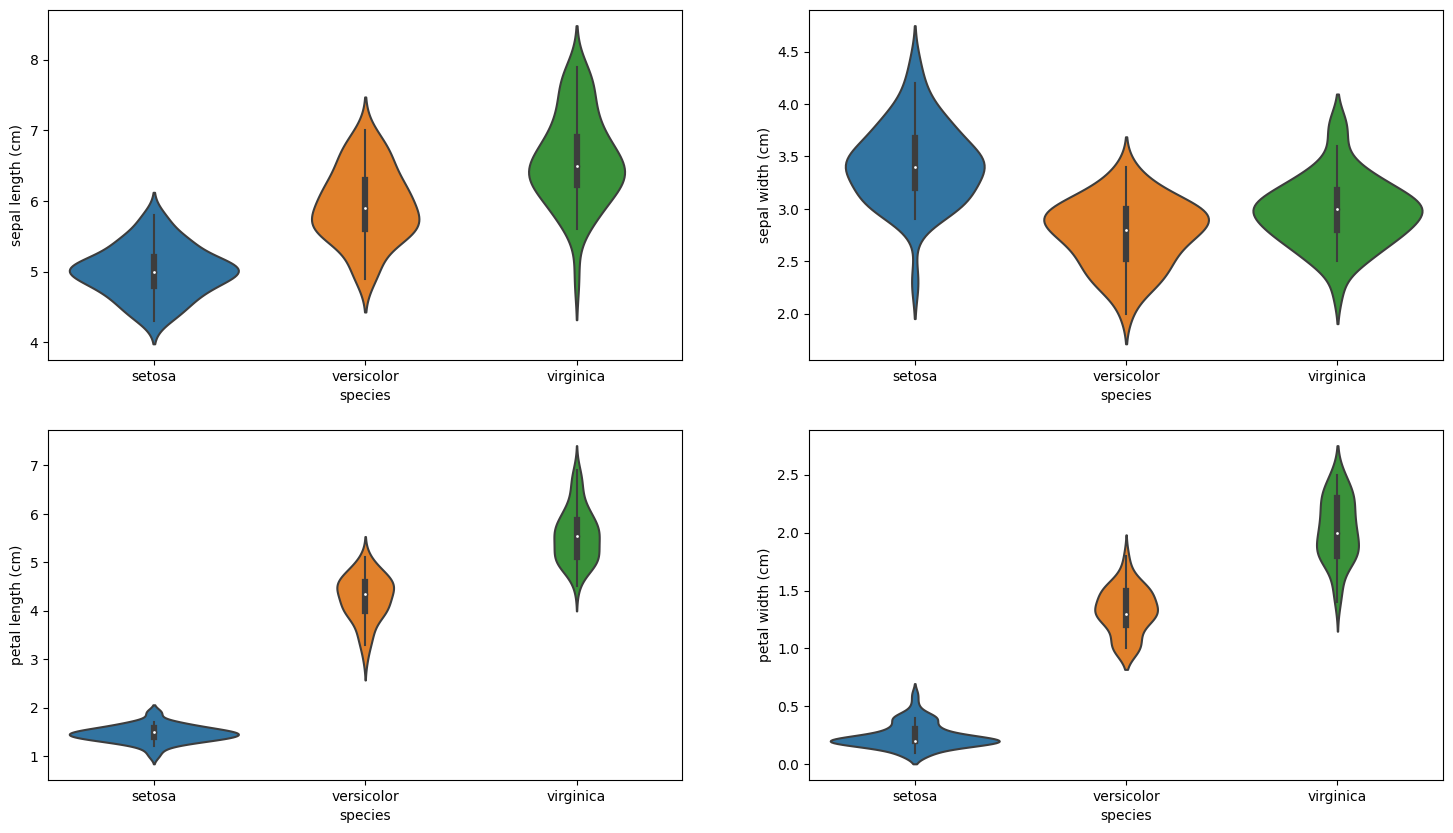

In [4]:
# Put your code here

fig, ax = plt.subplots(2,2,figsize=(18,10))
# sns.violinplot(x = df["species"], y = df["sepal_length"])

for index, feature in enumerate(iris.feature_names):
    sns.violinplot(x = df["species"], y = df[feature], ax=ax[index//2, index%2]) # plot on each subplot (row/2, column%2)

&#9989; **Question 1.3: (4 points)** What do you observe and learn from these plots?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

For most of the features the distributions are actually quite normal. We do though see some deviations from this such as virginica's petal length and sepal length are quite skewed. We also see the petal width of setosa is bimodal. We can also see that setosa has smaller petal widths and lengths and also sepal lengths than the other two. This could be telling of a good way to separate the data. 

&#9989; **Task 1.4: (2 points)**  Now make four box plots, one for each feature of the dataset.

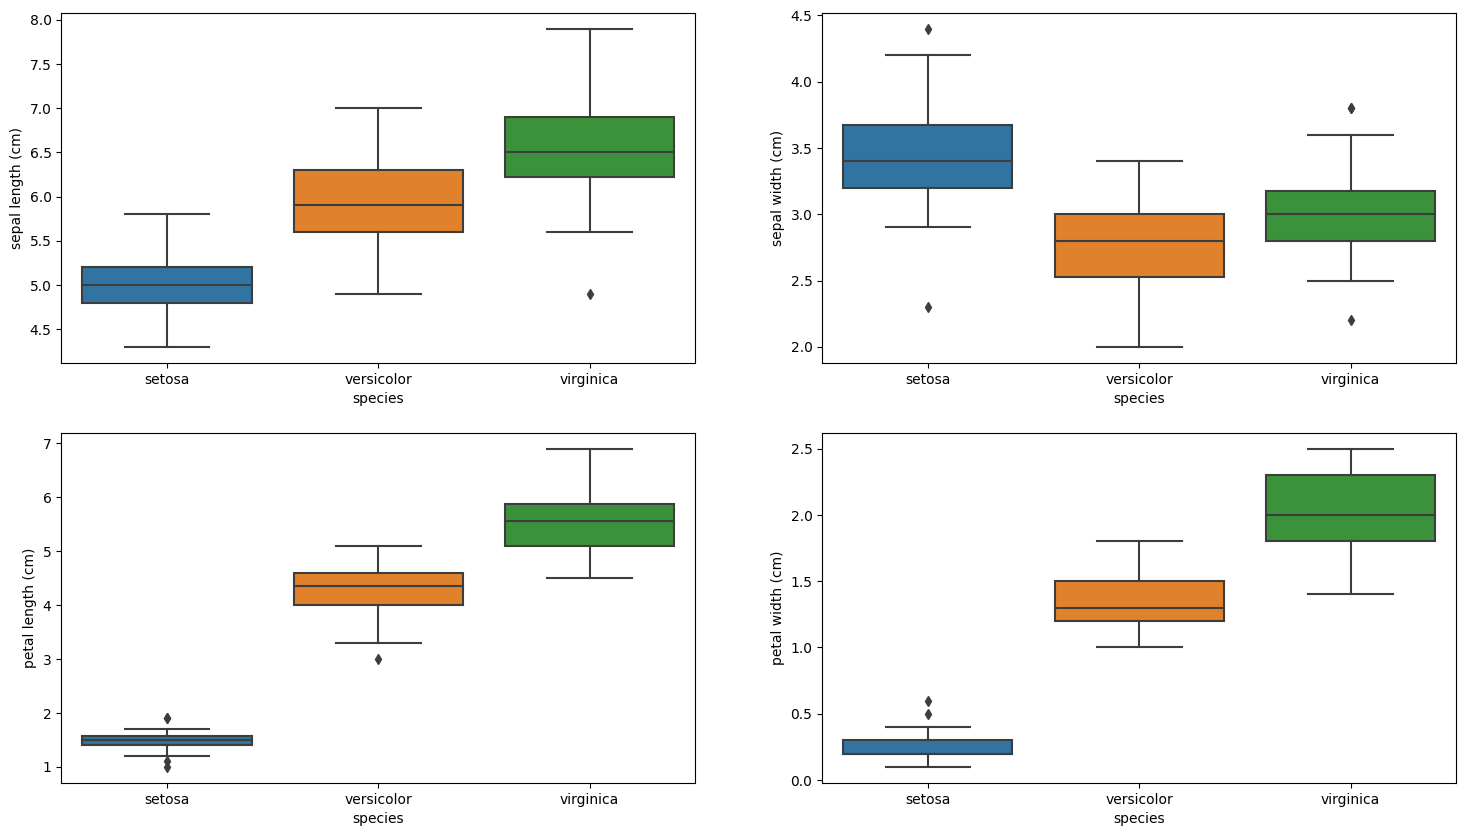

In [5]:
# Put your code here

fig, ax = plt.subplots(2,2,figsize=(18,10))

for index, feature in enumerate(iris.feature_names):
    sns.boxplot(x = df["species"], y = df[feature], ax=ax[index//2, index%2]) # plot on each subplot (row/2, column%2)

&#9989; **Question 1.5: (4 points)** What do you observe and learn from these plots?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

We see quite a spread of the data in some scenarios indicitive of the long whiskers. We also see much tighter data such as in all of the versicolor data. We do see the extreme skew of setosa's petal width as we saw before, but nothing about the bimodal nature of the data. There seems to not be many outliers in the data but still a handful.


---
## Part 2: Covariance Matrix, Linear Algebra and Multivariate Gaussians (10 points)

You may have noticed many deer roaming around the East Lansing area. What you may know less about is that some of them carry a prion disease called "[Chronic Wasting Disease](https://www.canr.msu.edu/chronic-wasting-disease/)", or CWD for short. Researchers at MSU in both the CMSE and the Fisheries and Wildlife departments are developing computational models to understand the spread of this disease. One of the measurements this team uses is GPS data from collars attached to some of the deer. The data reveal what is best known as a "random walk", and the researchers would like to make some sense out of this for their models. What information can we extract from data about deer positions? Let's imagine the location of an individial deer comes to you as a dataset with positions of the deer taken over some time frame, and we want to use just statistics to extract information from this data. 

Multivariate Gaussians enter just about every corner of ML, and they make connections between all of those corners. Here, you will explore connections between linear algebra and statistics in the context of building multivariate Gaussians.

Here, all you are going to do is make fake data, compute its statistical properties, plug them into a bivariate Gaussian and plot it with the original data. Imagine that the fake data you create be the positions of a deer carrying a GPS on its collar - let's see if we can extract meaningful information from this data about deer movement patterns. The goal of the research is to build a model that has the same statistical properties as the data.

The multivariate Gaussian distribution is given by:

$$\mathcal N(x_1, \ldots, x_p) = \frac{1}{\sqrt{(2\pi)^p {\rm det}({\boldsymbol \Sigma})}}\exp\left(-\frac{1}{2}({\bf x} - {\bf \mu})^T{\boldsymbol \Sigma}^{-1}({\bf x} - {\boldsymbol \mu}) \right).$$

Recall that $\bf \Sigma$ is the covariance matrix, $p$ is the number of variables (aka predictors, aka features) and $\mu$ is the mean. 

For this problem we only need a bivariate Gaussian, of course, since the deer roam only on the ground (thankfully). 

&#9989; **Question: (5 points)** Assume you have position data, _i.e._ longitude and latitude coordinates, for $N$ deers. What are the dimensions of ${\bf x}$, ${\bf \mu}$, ${\bf \Sigma}$, the product in the argument of the exponential, _i.e._ $({\bf x} - \mu)^{T} {\bf \Sigma}^{-1} ({\bf x} - \mu)$, and $\mathcal N$ ? 

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. ${\bf x}$ has size 1x2 for specific point and Nx2 for the data set
2. ${\bf \mu}$ has size 1x2
3. ${\bf \Sigma}$ has size 2x2
4. $({\bf x} - {\bf \mu})^T{\boldsymbol \Sigma}^{-1}({\bf x} - {\bf \mu} ) $ has size 1x1 for a specific point and Nx1 for the data set
5. $\mathcal N$ has size 1x1 for a specific point and Nx1 for the data set


**Note:** Check that your dimensions are consistent!

&#9989; **Task 2.1: (2 points)** Assume that $N = 2$, workout the math of the product $({\bf x} - {\bf \mu})^T{\boldsymbol \Sigma}^{-1}({\bf x} - {\bf \mu} ) $ and write the argument of the exponential for each deer. For the sake of simplicity, you can write the elements of ${\bf \Sigma}^{-1}$ as 

$${\bf \Sigma}^{-1} = \begin{pmatrix} \sigma_{11} & \sigma_{12}\\\sigma_{21} &\sigma_{22} \end{pmatrix}.$$

Note that this is needed for the next part. 

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

For deer 1:

$$E_1 = (x_1 - {\bf \mu})^T{\boldsymbol \Sigma}^{-1}(x_1 - {\bf \mu} )$$

$$ = \begin{pmatrix} \begin{pmatrix} x_{1_{Long}} \\ x_{1_{Lat}} \end{pmatrix} - \begin{pmatrix} \mu_{Long} \\ \mu_{Lat} \end{pmatrix}\end{pmatrix}^T \begin{pmatrix} \sigma_{11} & \sigma_{12}\\\sigma_{21} &\sigma_{22} \end{pmatrix} \begin{pmatrix} \begin{pmatrix} x_{1_{Long}} \\ x_{1_{Lat}} \end{pmatrix} - \begin{pmatrix} \mu_{Long} \\ \mu_{Lat} \end{pmatrix}\end{pmatrix}$$

$$ = \begin{pmatrix} x_{1_{Long}} - \mu_{Long} & x_{1_{Lat}} - \mu_{Lat} \end{pmatrix} \begin{pmatrix} \sigma_{11} & \sigma_{12}\\\sigma_{21} &\sigma_{22} \end{pmatrix} \begin{pmatrix} x_{1_{Long}} - \mu_{Long} \\ x_{1_{Lat}} - \mu_{Lat} \end{pmatrix}$$

$$ = \begin{pmatrix} (x_{1_{Long}} - \mu_{Long})\sigma_{11} + (x_{1_{Lat}} - \mu_{Lat})\sigma_{21} & (x_{1_{Long}} - \mu_{Long})\sigma_{12} + (x_{1_{Lat}} - \mu_{Lat})\sigma_{22} \end{pmatrix} \begin{pmatrix} x_{1_{Long}} - \mu_{Long} \\ x_{1_{Lat}} - \mu_{Lat} \end{pmatrix}$$

$$ = (x_{1_{Long}} - \mu_{Long})^2\sigma_{11} + (x_{1_{Lat}} - \mu_{Lat})^2\sigma_{22} + (x_{1_{Long}} - \mu_{Long})(x_{1_{Lat}} - \mu_{Lat})(\sigma_{12} + \sigma_{21})$$


For deer 2:

$$E_2 = (x_2 - {\bf \mu})^T{\boldsymbol \Sigma}^{-1}(x_2 - {\bf \mu} )$$

$$...$$

$$ = (x_{2_{Long}} - \mu_{Long})^2\sigma_{11} + (x_{2_{Lat}} - \mu_{Lat})^2\sigma_{22} + (x_{2_{Long}} - \mu_{Long})(x_{2_{Lat}} - \mu_{Lat})(\sigma_{12} + \sigma_{21})$$


&#9989; **Task 2.2: (4 points)** Let's code. Complete the code below

(120, 120)
(120, 120)


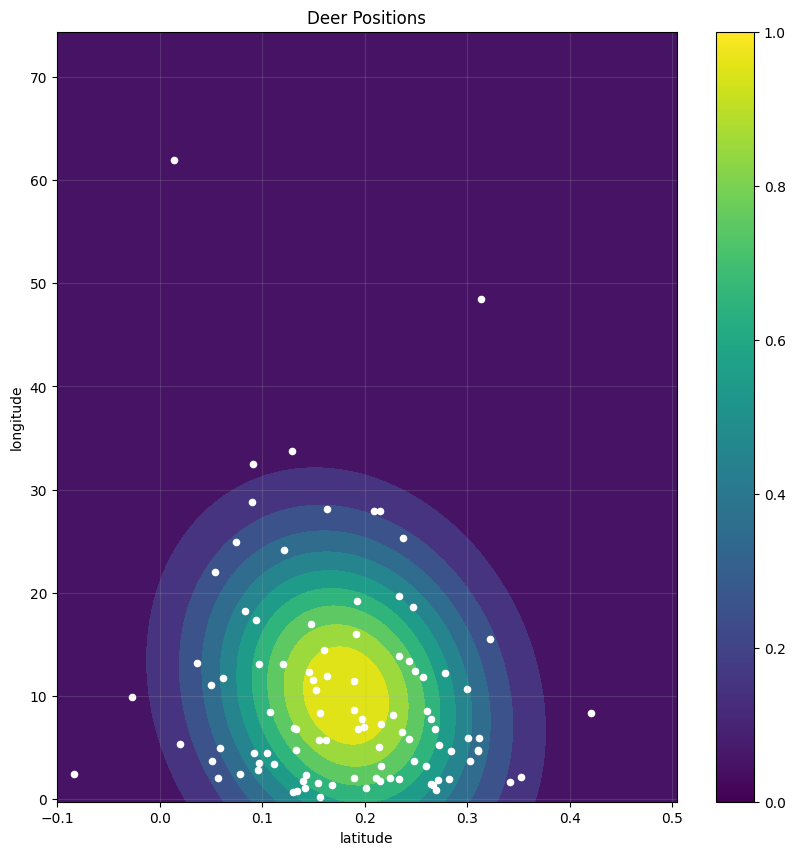

In [6]:
# Let's quickly make some fake data. 
num_deers = 100

# Generate fake position data. Here I am using a multivariate gaussian.
# DON'T USE THIS. IT'S TOO BORING. CREATE SOME DATA AND ADD SOME NOISE TO IT. 
x_data = np.random.normal(loc = (0.2, 0.5), scale = (0.1, 0.2), size = (num_deers, 2)) + np.random.exponential(scale = (0,10), size = (num_deers, 2))
 

# Calculate the mean of the longitude and latitude
x_mean = np.mean(x_data, axis = 0)

# Calculate the covariance matrix of your dataset
x_sigma = np.cov(x_data.T)

# Calculate its inverse
sigma_inv = np.linalg.inv(x_sigma)

# Plotting the result
num_points = 120
# Range of latitudes
x_a = np.linspace(-1.2*np.abs(np.min(x_data[:,0])), np.max(x_data[:,0])*1.2, num_points)
# Range of longitudes
y_a = np.linspace(-1.2*np.abs(np.min(x_data[:,1])), np.max(x_data[:,1])*1.2, num_points)
# Create a grid
X, Y = np.meshgrid(x_a, y_a)

fig = plt.figure(figsize=(10,10))
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.grid(alpha=0.2)
plt.title('Deer Positions')

# Calculate the argument of the exponential. 
# This should be equal to what you calculated above
exp_argument = (X - x_mean[0])**2 * sigma_inv[0,0] + (Y - x_mean[1])**2 * sigma_inv[1,1] + (X - x_mean[0]) * (Y - x_mean[1]) * (sigma_inv[0,1] + sigma_inv[1,0])
print(exp_argument.shape)
multivariate_gaussian = np.exp(- 0.5 * exp_argument)
print(multivariate_gaussian.shape)

# Plot the countours of the multivariate gaussian
plt.contourf(X, Y, multivariate_gaussian, levels = 10)

# Plot the deers' position
plt.scatter(x_data[:,0], x_data[:,1], c = 'w', s = 20)
plt.colorbar()

&#9989; **Question 2.3: (4 points)** Do to the contours look like the data? Why or why not?


<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

They do not exactly look like the data. This is because of the noise being adding to the data not being normal.

---
## Part 3: Anomaly Detection (25 points)


### Part 3.1: Creating and displaying synthetic data (13 points)

You are at a career fair on campus and you decide to meet with companies interested in hiring experts on machine learning. While talking to recruiters for one of the companies, they ask you what your experience and skill levels are. You tell them that currently they are very low, but you are in CMSE 491. Their jaws drop, and they immediately offer you a job starting upon completion of your AML class. 

At your first day on the job your boss comes to your office and gives you your first assignment. Because your clearance hasn't come through yet, she can't tell you all of the details, but you can get your code base functional in the meantime. What she does tell you is that one of the defense agencies is receiving emails from what might be a foreign hacker entity. These emails tend to have unusual values of certain traits (features), which she can only tell you (for now) are called $X_1$ and $X_2$. The agency is one of the largest in the world, so there is no way a human can examine all of the email traffic for the presence of unusual values of $X_1$ and $X_2$; you need to develop a code that examines the emails for values of these two traits, which will come to you as real numbers, and send an email to a human if you believe it is likely from an enemy actor. The problem is that all emails, even good emails, have some of $X_1$ and $X_2$, so what you need to do is look for what are called "anomalies". 

[Anomaly detection](https://en.wikipedia.org/wiki/Anomaly_detection) is a fairly large branch of ML, used widely in business to detect anything unusual, such as fraud. If you look up above at your box plots you will see dots that represent outliers - you can think of those as the anomalies in the iris data set. Who knows, maybe for those cases a completely different species of flower was accidently measured? Or, maybe that feature just has a weird distribution where there is some possiblity of "unusual" values? Usually, you need to flag those and take a closer look. 

First, you obtain a dataset of values from emails known to originate from _within_ the agency, so they are presumed "safe". Because you have no idea what $X_1$ and $X_2$ are, you decide to plot them first - what else can you do? And, you want the plot to look good and reveal trends in the data to show to your boss, so you use `seaborn`. 

Comment the code below. There are a few tricky steps in there; feel free to use the internet to help you. Include in the comments what `jointplot`, `multivariate_normal` and `kdeplot` are. Note the similarity to the type of information in a violin plot. 

[Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

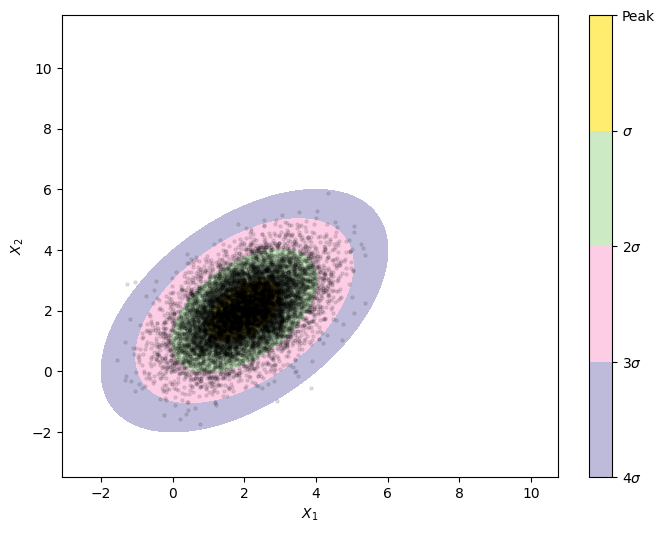

In [7]:
# Parameters for the multivariate normal distribution
mean_original = np.array([2, 2])
cov_original = np.array([[1, 0.5], [0.5, 1]])

total_size = int(1e4)
# Generate 99.7% of the data from a multivariate normal distribution
num_samples = int(.997*total_size)
rng = np.random.default_rng(seed = 42)

# multivariate_normal produces random samples from a multivariate normal distribution described by the mean and covariance matrix
X_original = rng.multivariate_normal(mean_original, cov_original, num_samples)

# Draw contours of the multivariate 
lim_mult = 2.0
x_array = np.linspace(lim_mult*X_original[:,0].min(), lim_mult*X_original[:,0].max(), 100)
y_array = np.linspace(lim_mult*X_original[:,1].min(), lim_mult*X_original[:,1].max(), 100)
X, Y = np.meshgrid(x_array, y_array)

inv_cov = np.linalg.inv(cov_original)

exp_argument = inv_cov[0,0] * (X - mean_original[0])**2 + 2.0 * inv_cov[0,1]*(X - mean_original[0])*(Y - mean_original[1]) + inv_cov[1,1]*(Y - mean_original[1])**2
multivariate_matrix = np.exp(- 0.5 * exp_argument)

# Choose the levels to plot. 
peak = multivariate_matrix.max()
levels_to_show = peak * np.array([0.0003335 , 0.01, 0.13 , 0.6 , 1.0]) 
# Plot the countours of the multivariate gaussian
fig, ax = plt.subplots(1,1, figsize=(8,6))
# I am plotting the log of the distribution because it is easier to show the colorbar
cntr = ax.contourf(X, Y, np.log(multivariate_matrix), levels = np.log(levels_to_show), cmap = "Set3")
# Plot the data. We need to plot the multivariate first otherwise the points don't show.
ax.scatter(X_original[:,0], X_original[:,1], s = 5, c = 'k',  alpha = 0.1, label = "Data")

cbar = fig.colorbar(cntr,
                    ticks=np.log(levels_to_show),
                    format=mticker.FixedFormatter([r'4$\sigma$', r'3$\sigma$', r'2$\sigma$', r'$\sigma$', 'Peak']),
                    extend='both'
                    )

ax.set( xlabel = r"$X_1$", ylabel = r"$X_2$")



As you can see most of the data falls into the $3\sigma$ distance from the center (0, 0). Let's add some outliers

In [8]:
# Generate outliers in the top left corner. These are easy to spot on a 2D plot
mean = mean_original + np.array([-4, 4])
cov_matrix = np.array([[1, 0.], [0., 1]])
num_outliers = int(0.0015*total_size)
easy_outliers = np.random.multivariate_normal(mean, cov_matrix, num_outliers)

# Generate outliers that are a little closer to the real data. 
mean = mean_original + np.array([5, 5])
cov_matrix = np.array([[1, 0.0], [0.0, 1]])
num_outliers = int(0.0015*total_size)
hard_outliers = np.random.multivariate_normal(mean, cov_matrix, num_outliers)
# Combine the data and outliers
X_data = np.vstack([X_original, easy_outliers, hard_outliers])

# Put everything into a Dataframe 
data_df = pd.DataFrame( X_data, columns=["X_1", "X_2"])


Let's now remake the original plot and show the outliers. 

[Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

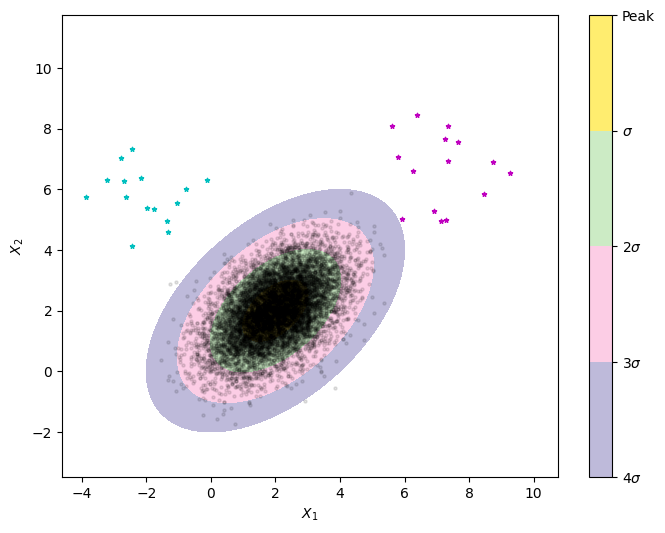

In [9]:
# Remake the previous plot and show the outliers now
fig, ax = plt.subplots(1,1, figsize=(8,6))
cntr = ax.contourf(X, Y, np.log(multivariate_matrix), levels = np.log(levels_to_show), cmap = "Set3")
# Plot the data. We need to plot the multivariate first otherwise the points don't show.
ax.scatter(X_original[:,0], X_original[:,1], s = 5, c = 'k', alpha = 0.1, label = "Data")

cbar = fig.colorbar(cntr,
                    ticks=np.log(levels_to_show),
                    format=mticker.FixedFormatter([r'4$\sigma$', r'3$\sigma$', r'2$\sigma$', r'$\sigma$', 'Peak']),
                    extend='both'
                    )

# Plot the easy to spot outliers as cyan points
ax.scatter(easy_outliers[:,0], easy_outliers[:,1], s = 10, marker = '*', c = 'c', label = 'Easy to spot outliers')

# Plot the not so easy to spot outliers as magenta points
ax.scatter(hard_outliers[:,0], hard_outliers[:,1], s = 10, marker  ='*', c = 'm',label = 'Hard to spot outliers')
# Don't forget the labels !!!
ax.set( xlabel = r"$X_1$", ylabel = r"$X_2$")

Well, that was a lot of work. Can seaborn make a similar plot with less code? 

&#9989; **Task 3.1.1: (3 points)** Run the code below and add comments

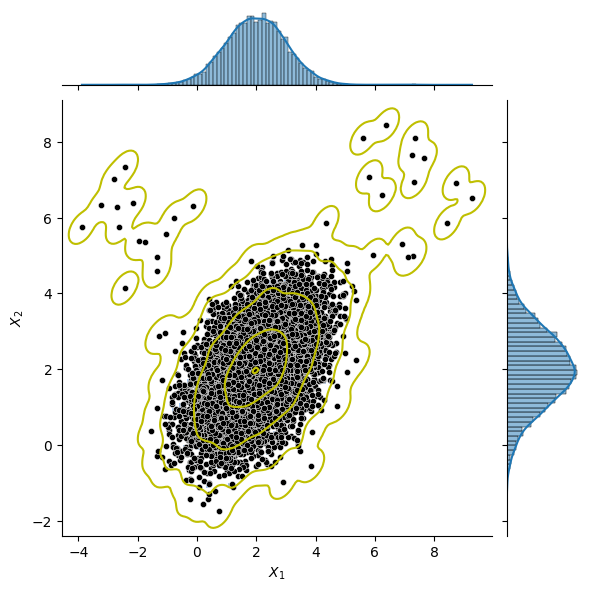

In [10]:
# # comment this line in detail
g = sns.JointGrid(data = data_df, x="X_1", y="X_2") #creates a plot against two variables with customized axes of one variable plots
h1 = g.plot_joint(sns.histplot, pthresh = 0.001) #Creates empty plot
s1 = g.plot_joint(sns.scatterplot, s=20, c = 'k') #plots the data as a scatter plot
k1 = g.plot_joint(sns.kdeplot, color="y", levels = levels_to_show) #plots the kernel density estimate of the data
m1 = g.plot_marginals(sns.histplot, bins = 'fd', kde = True) #plots histograms of the data on the margins
h1.set_axis_labels( xlabel = r"$X_1$", ylabel = r"$X_2$") #sets the axis labels
# # take your time figuring this one out! change the kind to { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

&#9989; **Task 3.1.2: (10 points)** Using your own words (not the documentation's) answer the following questions

1. What does `JointGrid` do?
2. What does the option `pthresh` in `sns.histplot` do? Play with it.
3. What does `sns.kdeplot` do?
4. Why are the contours different that the ones we draw using `contourf`?
5. What does `bins = 'fd'` do? What are other options?

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. creates a plot against two variables with customized axes of one variable plot
2. pthresh is the threshold such that counts up to the value are not shown
3. sns.kdeplot creates a kernel density estimate plot
4. the contours are different because the kdeplot is a kernel density estimate plot while the contourf is a contour plot. We would expect them to look different because the kdeplot is a probability density function while the contourf is a contour plot of the data.
5. bins = 'fd' uses the Freedman-Diaconis rule to determine the number of bins. Which means "The binwidth is proportional to the interquartile range (IQR)
    and inversely proportional to cube root of a.size" (NumPy Doc). It uses np.histogram_bin_edges to calculate. Other options are 'auto', 'sturges', 'sqrt', and 'scott'

### Part 3.2. What is an Anomaly Anyway? (12 points)

What you need first is a definition of "anomaly"; you decide to do this by first exploring your data. We have done this by making plots above. The plots show that most of the data (99% of it to be exact) can be described by a multivariate normal distribution centered at the coordinates given by `mean_original`. 
Thus, we can define the anomalies as all those points that are outside the normal distribution, to be precise all those points that are $3 \sigma$  and more away from the center. 

However, we would like to have a better way to find outliers when our data has more than two dimensions. As mentioned in class, one way to do this would be to calculate the distance of all the points and set a threshold value. In the next part you are going to compare two distance measures.

&#9989; **Task 3.2.1: (6 points)** Imagine you didn't create the data above and it was just given to you. In the next code cell calculate the mahalanobis distance, the euclidean distance, and the standard euclidean distance for each row of the `data_df` dataset. 

**Note:** You need to find the distance functions in `scipy`.

In [11]:
# Import scipy's functions
from scipy.spatial.distance import mahalanobis, euclidean, seuclidean

# Calculate the three distances for each data point and append them to these lists
mahalanobis_distances = []
euclidean_distances = []
seuclidean_distances = []

# Put your code here
for data_point in data_df.values:
    mahalanobis_distances.append(mahalanobis(data_point, mean_original, inv_cov)) #mahalanobis
    euclidean_distances.append(euclidean(data_point, mean_original)) #euclidean
    seuclidean_distances.append(seuclidean(data_point, mean_original, np.diagonal(cov_original))) #standardized euclidean


# Convert the distances to a pandas series
mahalanobis_series = pd.Series(mahalanobis_distances, name='Mahalanobis_Distance')
euclidean_series = pd.Series(euclidean_distances, name='Euclidean_Distance')
seuclidean_series = pd.Series(seuclidean_distances, name='SEuclidean_Distance')
# Attach the distances to the dataframe
df = pd.concat([data_df, mahalanobis_series, euclidean_series,seuclidean_series], axis=1)

# Let's show the dataset
df


,X_1,X_2,Mahalanobis_Distance,Euclidean_Distance,SEuclidean_Distance
0,2.256099,1.216115,1.083706,0.824659,0.824659
1,0.879808,1.820373,1.203262,1.134503,1.134503
2,4.340736,3.038556,2.345679,2.560790,2.560790
3,2.047408,1.731166,0.341105,0.272982,0.272982
4,2.441072,1.588028,0.853209,0.603544,0.603544
...,...,...,...,...,...
9995,7.342868,8.106133,6.654005,8.113637,8.113637
9996,6.376182,8.449880,6.585446,7.794352,7.794352
9997,7.332842,6.951335,5.949816,7.277013,7.277013
9998,5.618129,8.099542,6.134746,7.091915,7.091915


&#9989; **Task 3.2.2: (2 points)** Now that you have calculated the distances you need to choose a threshold. 

Text(0, 0.5, '$X_2$')

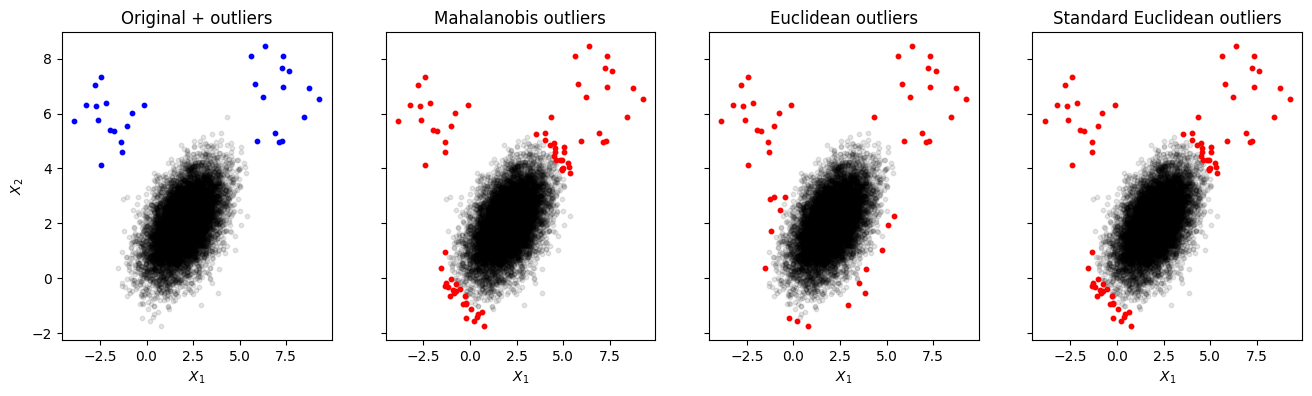

In [15]:
# Choose a threshold for each distance and plot 
threshold = df["Mahalanobis_Distance"].mean() + 3*df["Mahalanobis_Distance"].std()
M_data = df[ df["Mahalanobis_Distance"] > threshold] 
threshold = df["Euclidean_Distance"].mean() + 3*df["Euclidean_Distance"].std()
E_data = df[ df["Euclidean_Distance"] > threshold] 
threshold = df["SEuclidean_Distance"].mean() + 3*df["SEuclidean_Distance"].std()
SE_data = df[ df["SEuclidean_Distance"] > threshold] 

# Let's plot
fig, ax = plt.subplots(1,4, figsize = (16, 4), sharey=True)
ax[0].scatter(X_original[:,0], X_original[:,1], alpha= 0.1, c = 'k', s = 10)
ax[0].scatter(easy_outliers[:,0], easy_outliers[:,1],  c = 'b', s = 10)
ax[0].scatter(hard_outliers[:,0], hard_outliers[:,1],  c = 'b', s = 10)
ax[1].scatter(X_data[:,0], X_data[:,1], alpha= 0.1, c = 'k', s = 10)
ax[1].scatter(E_data["X_1"], E_data["X_2"],  c = 'r', s = 10)
ax[2].scatter(X_data[:,0], X_data[:,1], alpha= 0.1, c = 'k', s = 10)
ax[2].scatter(M_data["X_1"], M_data["X_2"],  c = 'r', s = 10)
ax[3].scatter(X_data[:,0], X_data[:,1], alpha= 0.1,c = 'k', s = 10)
ax[3].scatter(SE_data["X_1"], SE_data["X_2"],  c = 'r', s = 10)

for a, t in zip(ax, ["Original + outliers", "Mahalanobis outliers", "Euclidean outliers", "Standard Euclidean outliers"]):
    a.set( xlabel = r'$X_1$', title = t)
ax[0].set_ylabel(r'$X_2$')
# plt.title('Data in Zero Region Are Possible Attacks')


&#9989; **Task 3.2.3: (4 points)** Do your distances find all the outliers? Why or why not?


<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

They do find all the outliers but also include some of the data that is not an outlier. This is because the data was produced using the multivariate gaussian so the distance of the data from the center is not the only factor in determining whether it is an outlier or not. The mahalanobis distance takes into account the covariance of the data and the euclidean distance does not. I am not sure why the standard euclidean distance does not find all the outliers.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**


In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/QyrbnptkyA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.